# BUSINESS UNDERSTANDING:
During this project, I assumed the role of a data scientist whereby I used our dataset("kc_house_data.csv") to generate 
various business problems that will be the founding blocks of our multiple linear regression models.
# Business problems:
1. Provide insight to Vision Real Estate Agency on how the location of houses can cause changes in house prices 
   and by how much.
​
2. Provide insight to Vision Real Estate Agency on how the area of a house above the basement can cause changes 
   in house prices and by how much.
                       
3. Provide advice to homeowners about how home renovations might increase the estimated value of their homes and
   by what amount.   
   
4. Provide advice to  the company on which type of houses to construct eg Houses with a water front.

# DATA UNDERSTANDING.
Our dataset("kc_house_data.csv") contains Kings County housing data. The data set consists of 21 columns and 21612 rows.
The columns are: ![1_tfBY7bRc6ttOaBmUX4RVyg](https://user-images.githubusercontent.com/110511316/192426070-98622317-8209-4533-b909-d2978a2ec870.png)

In [1]:
# importing the necessary liblaries.
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
# Viewing the data from our source.
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# Viewing the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# DATA CLEANING.
This was done to ensure the Validity, Accuracy, Completeness, Consistency and Uniformity of the Data.
​
TASK1 :The first task was to check if the column names were uniform and readable.
​
TASK2 :The second task was to check for duplcated rows.
​
TASK3 :The next task was to check if there were missing values.
​
TASK4 :The next task was to decide how to deal with the missing values.
       (Either drop if they are unnecesary or replace the missing values with the best fit.)
       
TASK5 :The last task was to check if the columns had the correct data type.

In [5]:
df.head()
#TASK1: All column names are uniform and readable.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.duplicated().value_counts()
#TASK2: THERE WERE NO DUPLICATE VALUES.

False    21613
dtype: int64

In [7]:
df.isna().sum()
#TASK3: There were 2 missing values in sqft_above

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.dropna(subset=['sqft_above'], inplace= True)
#TASK4: decided to drop the rows with missing values since they are only 2 and cannot cause a significant change to our data.
df.isna().sum()
# Confirm no more missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.info()
#TASK5: The last task was to check if the columns had the correct data type
#Zipcode hadthe wrong data type 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long  

In [10]:
df['zipcode'] = df['zipcode'].astype('str')
#Changed zipcode datatype to string.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  object 
 17  lat            21611 non-null  float64
 18  long  

##  MODEL 1

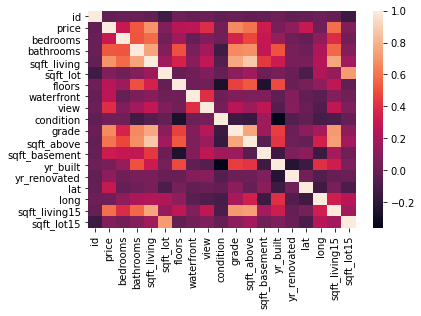

In [11]:
#Check for multi collinearity
sns.heatmap(df.corr());

In [12]:
#Test if our column's data is normal.
from scipy.stats import shapiro
shapiro(df['price'])

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7120094299316406, pvalue=0.0)

In [13]:
df.corr()["price"] 

id              -0.016742
price            1.000000
bedrooms         0.308366
bathrooms        0.525150
sqft_living      0.702055
sqft_lot         0.089661
floors           0.256814
waterfront       0.266371
view             0.397299
condition        0.036379
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323842
yr_built         0.054006
yr_renovated     0.126436
lat              0.307010
long             0.021613
sqft_living15    0.585377
sqft_lot15       0.082448
Name: price, dtype: float64

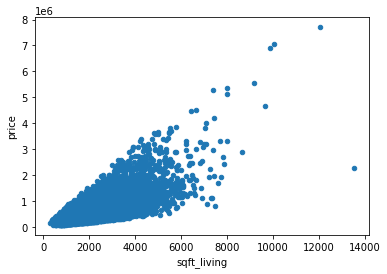

In [14]:
df.plot.scatter(x="sqft_living", y="price");

In [15]:
y = df["price"]
X_baseline = df[["sqft_living"]]

In [16]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:23:36   Log-Likelihood:            -3.0024e+05
No. Observations:               21611   AIC:                         6.005e+05
Df Residuals:                   21609   BIC:                         6.005e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.362e+04   4402.952     -9.908      

### Simple Linear Regression Results
​
Looking at the summary above, we can see that the regression line we found was
​
$$ \hat{price} = (-4.362e+04) + 280.6495 sqft_living $$
​
* The model is statistically significant overall, with an F-statistic p-value well below our alpha of 0.05.
* The model explains about 49.3% of the variance in price.
* The model coefficients (`const` and `sqft_living`) are both statistically significant, with p-values well below 0.05
* If a house has at least 1sqft living room space, we would expect it to be about 280 dollars more expensive than a house with   no living room space.

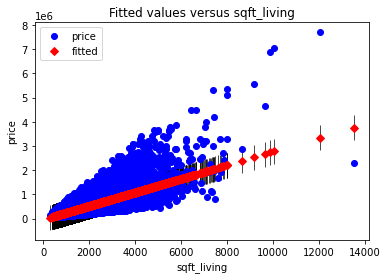

In [18]:
sm.graphics.plot_fit(baseline_results, "sqft_living")
plt.show()

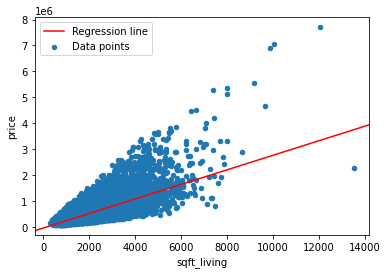

In [19]:
fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="red")
ax.legend();

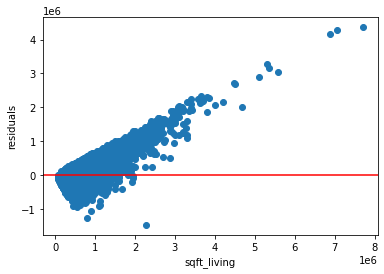

In [20]:
fig, ax = plt.subplots()

ax.scatter(df["price"], baseline_results.resid)
ax.axhline(y=0, color="red")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

## Adding Another Independent Variable

Now let's expand from our simple linear regression to a multiple linear regression. It looks like `sqft_above` is our  second most strongly _positively_ correlated predictor, so let's add that.

The process of building this model with StatsModels is very similar to the process of building our baseline simple regression model; this time we simply create a variable containing multiple columns.

In [21]:
df.corr()["sqft_living"] 

id              -0.012166
price            0.702055
bedrooms         0.576763
bathrooms        0.754684
sqft_living      1.000000
sqft_lot         0.172841
floors           0.354048
waterfront       0.103829
view             0.284647
condition       -0.058689
grade            0.762727
sqft_above       0.876644
sqft_basement    0.434925
yr_built         0.318066
yr_renovated     0.055377
lat              0.052530
long             0.240187
sqft_living15    0.756440
sqft_lot15       0.183301
Name: sqft_living, dtype: float64

In [46]:
two_independent_vars = df[["yr_built", "sqft_living"]]
two_independent_vars

,yr_built,sqft_living
0,1955,1180
1,1951,2570
2,1933,770
3,1965,1960
4,1987,1680
...,...,...
21608,2009,1530
21609,2014,2310
21610,2009,1020
21611,2004,1600


In [47]:
two_independent_vars_model = sm.OLS(y, sm.add_constant(two_independent_vars))
two_independent_vars_model_results = two_independent_vars_model.fit()

print(two_independent_vars_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                 1.193e+04
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:23:40   Log-Likelihood:            -2.9954e+05
No. Observations:               21611   AIC:                         5.991e+05
Df Residuals:                   21608   BIC:                         5.991e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.547e+06   1.21e+05     37.691      

In [49]:
df['yr_built'].nunique()
df['yr_built']

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 21611, dtype: int64

### Model with Two Features Results

This time, the model we built was:

$$ \hat{price} = ( -4.089e+04  ) + 18.9320sqft_basement  + 276.6824 sqft_living $$

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 49.3% of the variance in price which is consta
* The model coefficients(`const`, `condition`, and `sqft_living`)are all statistically significant, with t-statistic p-values   well below 0.05
* For each increase of 1  in condition, we see an associated increase in price of about 43920.
* This is a big increase than we saw with the simple model. 
* For each increase of 1 in the sqft_living, we see an associated increase in price of about 282.4759

In [24]:
three_independent_vars = df[["sqft_basement", "sqft_living", "floors"]]
three_independent_vars

,sqft_basement,sqft_living,floors
0,0,1180,1.0
1,400,2570,2.0
2,0,770,1.0
3,910,1960,1.0
4,0,1680,1.0
...,...,...,...
21608,0,1530,3.0
21609,0,2310,2.0
21610,0,1020,2.0
21611,0,1600,2.0


In [25]:
three_independent_vars_model = sm.OLS(y, sm.add_constant(three_independent_vars))
three_independent_vars_model_results = three_independent_vars_model.fit()

print(three_independent_vars_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     7024.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:27:16   Log-Likelihood:            -3.0022e+05
No. Observations:               21611   AIC:                         6.005e+05
Df Residuals:                   21607   BIC:                         6.005e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.787e+04   5911.613     -9.790